In [10]:
# It looks like the reps number does not reduce the absolute difference between
# human and auto marks (i.e., chaing the n of reps from 5 to 20 does not 
# change mean and std.dev.)

res.df <- read.csv('./data/robomarker/results.csv')

res.aggr <- aggregate(res.df, list(res.df$nreps), FUN=mean, na.rm=TRUE)

res.aggr


Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


Group.1,testname,nreps,ncases,meandiff,sddiff
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,NA,5,20,1.916250,2.787564
10,NA,10,20,2.089861,2.791607
20,NA,20,20,1.715083,2.787847


[1] "Human score:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.500   4.167   6.000  10.000 

[1] "Auto score 10 reps:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.700   6.700   6.029   8.000   9.400 

[1] "Auto score 10 reps X:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.700   6.800   5.785   7.800  10.000 


Difference 10 reps:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -4.100   0.300   2.000   1.862   3.444   7.800 


Difference 10 reps X:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.300   0.000   1.500   1.618   2.900   5.600 

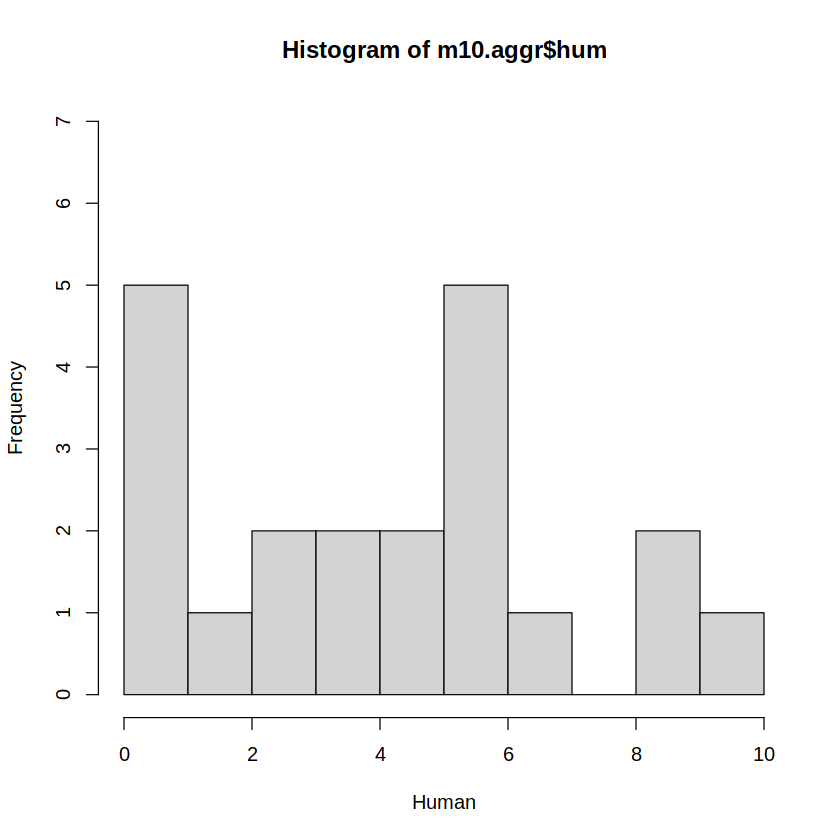

[1] 2.567196
[1] 1.884656
[1] 2.435906


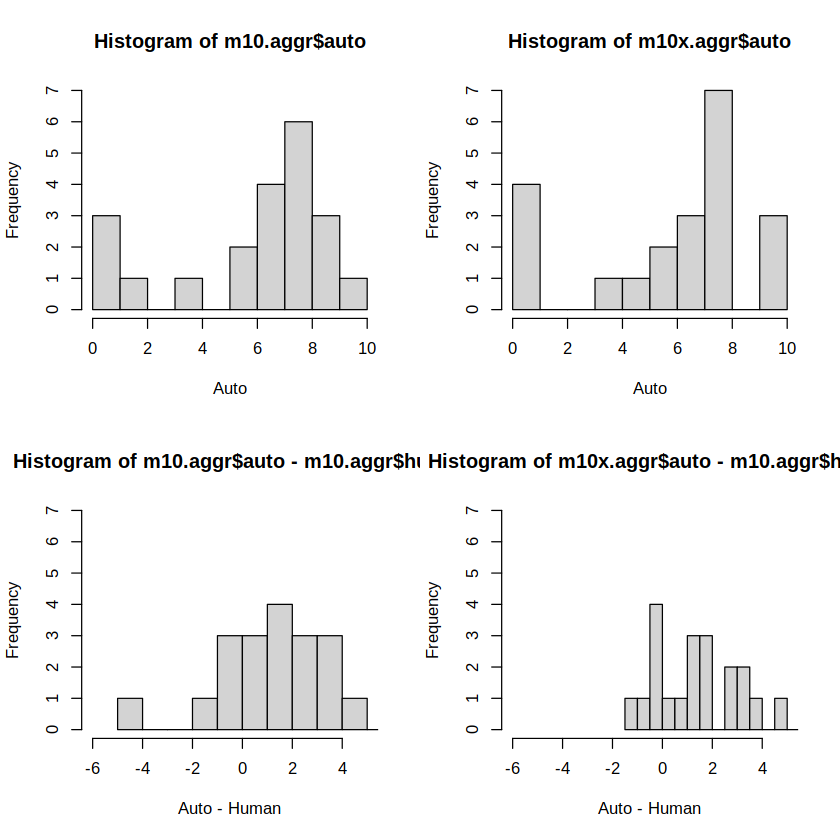

In [6]:
#library(pivottabler)

m10.df <- read.csv('./data/robomarker/marks-124150-305028-1302503-10.csv')
m20.df <- read.csv('./data/robomarker/marks-124150-305028-1302503-20.csv')
m10x.df <- read.csv('./data/robomarker/marks-124150-305028-1302503-10x.csv')

xlim.d=c(0,10)
ylim.d=c(0, 7)
xlim.diff=c(-6,5)
nfreq=10

m10.df$diff <- abs(m10.df$hum - m10.df$auto)
m10x.df$diff <- abs(m10x.df$hum - m10x.df$auto)
m20.df$diff <- abs(m20.df$hum - m20.df$auto)

m10.aggr <- aggregate(m10.df, list(m10.df$id), FUN=mean, na.rm=TRUE)
m10x.aggr <- aggregate(m10x.df, list(m10x.df$id), FUN=mean, na.rm=TRUE)
m20.aggr <- aggregate(m20.df, list(m20.df$id), FUN=mean, na.rm=TRUE)

print('Human score:')
summary(m10.aggr$hum)
par(mfrow=c(1,1))
hist(m10.aggr$hum, xlab='Human', xlim=xlim.d, ylim=ylim.d, breaks=nfreq)
par(mfrow=c(2,2))

print('Auto score 10 reps:')
summary(m10.aggr$auto)
hist(m10.aggr$auto, xlab='Auto', xlim=xlim.d, ylim=ylim.d, breaks=nfreq)

print('Auto score 10 reps X:')
summary(m10x.aggr$auto)
hist(m10x.aggr$auto, xlab='Auto', xlim=xlim.d, ylim=ylim.d, breaks=nfreq)

writeLines('\nDifference 10 reps:')
summary(m10.aggr$auto - m10.aggr$hum)
hist(m10.aggr$auto - m10.aggr$hum, xlab='Auto - Human', xlim=xlim.diff, ylim=ylim.d, breaks=nfreq)
writeLines('\nDifference 10 reps X:')
summary(m10x.aggr$auto - m10x.aggr$hum)
hist(m10x.aggr$auto - m10.aggr$hum, xlab='Auto - Human', xlim=xlim.diff, ylim=ylim.d, breaks=nfreq)

print(mean(m10.aggr$diff))
print(mean(m10x.aggr$diff))
print(mean(m20.aggr$diff))


In [3]:
nrow(m10x.df)

[1] 210

In [33]:
compPT <- function (df) {
  pt <- PivotTable$new()
  pt$addData(df)
  pt$addRowDataGroups('id')
  pt$defineCalculation(calculationName="MeanAutoMarks", summariseExpression="mean(auto, na.rm=TRUE)", format="%.2f")
  pt$defineCalculation(calculationName="StdDevAutoMarks", summariseExpression="sd(auto, na.rm=TRUE)", format="%.2f")
  pt$defineCalculation(calculationName="HumMarks", summariseExpression="mean(hum, na.rm=TRUE)", format="%.2f")
  pt$defineCalculation(calculationName="MeanDiff", summariseExpression="abs(mean(auto, na.rm=TRUE) - mean(hum, na.rm=TRUE))", format="%.2f")
  pt$evaluatePivot()
  return(pt)
}

compPT(m10.df)$asDataFrame()['Total',c('MeanDiff')]
#compPT(m10x.df)$asDataFrame()['Total',c('MeanDiff')]

df <- compPT(m10.df)$asDataFrame()
df$id <- rownames(df)
#df
mean(df$MeanDiff, na.rm=TRUE)
mean(subset(df, id != 'Total', c('MeanDiff'))$MeanDiff, na.rm=TRUE)
subset(df, id != 'Total', c('MeanDiff'))
#names(df)

#mean(compPT(m10.df)$asDataFrame()[!='Total',c('MeanDiff')])
#sd(compPT(m10.df)$asDataFrame()[,c('MeanDiff')])

#compPT(m10.df)$asDataFrame()[,c('MeanDiff')]
#compPT(m10.df)

[1] 1.926016

[1] 2.465324

[1] 2.491005

,MeanDiff
,<dbl>
26798281,0.8888889
26798282,3.7000000
26798283,3.4444444
26798284,2.0000000
26798286,0.0000000
26798287,6.4000000
26798288,0.3000000
26798289,2.4000000
26798290,7.8000000
